In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from qutip import *

In [138]:
# Parameters

w0 = 1
w0_res = 1
wf = 1
f1 = 0.6/np.sqrt(2)
f2 = 0.6
T = np.arange(0.01,2,0.05)
Beta = 1/T

In [139]:
# Hamiltonian of the Jaynes-Cummings in the {|0+>,|0->,|1+>,|1->,...,|n+>,|n->} basis

def wnp(g, n):
    return 0.5*(np.sqrt(4.0*g**2*(n+1)+(w0-wf)**2)+wf+2.0*n*wf)

def wnm(g, n):
    return 0.5*(-np.sqrt(4.0*g**2*(n+1)+(w0-wf)**2)+wf+2.0*n*wf)

In [140]:
def row1(nph):
    return [2*i for i in range(0, nph+1)]
    
def col1(nph):
    return [2*i for i in range(0, nph+1)]

def data1(g, nph):
    return [wnp(g, i) for i in range(0, nph+1)]

def row2(nph):
    return [2*i+1 for i in range(0, nph+1)]

def col2(nph):
    return [2*i+1 for i in range(0, nph+1)]

def data2(g, nph):
    return [wnm(g, i) for i in range(0, nph+1)]

def hjcp(g, nph):
    return Qobj(csr_matrix((data1(g, nph), (row1(nph), col1(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray() + csr_matrix((data2(g, nph), (row2(nph), col2(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

In [141]:
def cosn(g, n):
    return np.sqrt((w0-wf+np.sqrt(4*g**2*(1+n)+(w0-wf)**2))/np.sqrt(4*g**2*(1+n)+(w0-wf)**2))/np.sqrt(2)

def sinn(g, n):
    return np.sqrt((-w0+wf+np.sqrt(4*g**2*(1+n)+(w0-wf)**2))/np.sqrt(4*g**2*(1+n)+(w0-wf)**2))/np.sqrt(2)

def sinn_ar(g, nph):     
    return [sinn(g, x) for x in range(0, nph+1)]

def cosn_ar(g, nph):
    return [cosn(g, x) for x in range(0, nph+1)]

In [142]:
def row3(nph):
    return [i for i in range(0, 2*(nph+1))]
def col3(nph):
    return [i for i in range(0, 2*(nph+1))]
def data3a(g, nph):
    return [cosn_ar(g, nph)[i] for i in range(0, nph+1)]

def data3(g, nph):
    return list(np.repeat(data3a(g, nph), 2))

def row4(nph):
    return [2*i for i in range(0, nph+1)]

def col4(nph):
    return [2*i+1 for i in range(0, nph+1)]

def data4(g, nph):
    return [-sinn_ar(g, nph)[i] for i in range(0, nph+1)]

def row5(nph):
    return [2*i+1 for i in range(0, nph+1)]
def col5(nph):
    return [2*i for i in range(0, nph+1)]

def data5(g, nph):
    return [sinn_ar(g, nph)[i] for i in range(0, nph+1)]

def t(g,nph):
    return Qobj(csr_matrix((data3(g, nph), (row3(nph), col3(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray()+csr_matrix((data4(g, nph), (row4(nph), col4(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray()+csr_matrix((data5(g, nph), (row5(nph), col5(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def tinv(g,nph):
    return Qobj(np.linalg.inv(t(g,nph)))



In [144]:
def row6(nph):
    return [2*i for i in range(0, nph+1)]

def col6(nph):
    return [2*i for i in range(0, nph+1)]

def data6(nph):
    return [f1 for i in range(0, nph+1)]

def row7(nph):
    return [2*i+1 for i in range(0, nph+1)]

def col7(nph):
    return [2*i+1 for i in range(0, nph+1)]

def data7(nph): 
    return [-f1 for i in range(0, nph+1)]

def row8(nph):
    return [2*i+1 for i in range(0, nph+1)]

def col8(nph):
    return [2*i for i in range(0, nph+1)]

def data8(nph):
    return [f2 for i in range(0, nph+1)]

def row9(nph):
    return [2*i for i in range(0, nph+1)]

def col9(nph): 
    return [2*i+1 for i in range(0, nph+1)]

def s(nph):
    "Ladder Operator of the Reservoir"
    return Qobj(csr_matrix((data6(nph), (row6(nph), col6(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray()+csr_matrix((data7(nph), (row7(nph), col7(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray()+csr_matrix((data8(nph), (row8(nph), col8(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def sd(nph):
    "Ladder Operator of the Reservoir"
    return Qobj(csr_matrix((data6(nph), (row6(nph), col6(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray()+csr_matrix((data7(nph), (row7(nph), col7(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray()+csr_matrix((data8(nph), (row9(nph), col9(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def row10(nph):
    return [2*i+1 for i in range(0, nph+1)]

def col10(nph):
    return [2*i+1 for i in range(0, nph+1)]

def data10(nph):
    return [1 for i in range(0, nph+1)]

def nmnm(nph):
    return Qobj(csr_matrix((data10(nph), (row10(nph), col10(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def row11(nph):
    return [2*i for i in range(0, nph+1)]

def col11(nph):
    return [2*i for i in range(0, nph+1)]

def npnp(nph):
    return Qobj(csr_matrix((data10(nph), (row11(nph), col11(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def row12(nph):
     return [2*i+1 for i in range(0, nph+1)]

def col12(nph):
    return [2*i for i in range(0, nph+1)]

def data12(nph):
    return [1 for i in range(0, nph+1)]

def nmnp(nph):
    return Qobj(csr_matrix((data12(nph), (row12(nph), col12(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def row13(nph):
    return [2*i for i in range(0, nph+1)]

def col13(nph): 
    return [2*i+1 for i in range(0, nph+1)]

def data13(nph):
    return [1 for i in range(0, nph+1)]

def npnm(nph):
    return Qobj(csr_matrix((data13(nph), (row13(nph), col13(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def sigma_zp(nph):
    return npnp(nph)-nmnm(nph)

def sigma_xp(nph):
    return nmnp(nph)+npnm(nph)

def sigma_yp(nph):
    return -1j*npnm(nph)+1j*nmnp(nph)

In [145]:
def z(beta):
    "Partition Function of the two level atom in thermal equilibrium"
    return np.exp(-0.5*beta*w0_res)+np.exp(0.5*beta*w0_res)

def rho_th(beta):
    "Density Matrix of the two level atom ensemble in thermal equilibrium"
    return Qobj(np.array([[np.exp(-0.5*beta*w0_res)/z(beta),0],[0,np.exp(0.5*beta*w0_res)/z(beta)]]))

def c1(Nmax, beta):
    "Constant relating the bath element (atom)"
    sigma_minus = Qobj(np.array([[0,0],[1,0]]))
    sigma_plus = Qobj(np.array([[0,1],[0,0]]))
    return Nmax*(sigma_minus*sigma_plus*rho_th(beta)).tr()

def c2(Nmax, beta):
    sigma_minus = Qobj(np.array([[0,0],[1,0]]))
    sigma_plus = Qobj(np.array([[0,1],[0,0]]))
    "Constant relating the bath element (atom)"
    return Nmax*(sigma_plus*sigma_minus*rho_th(beta)).tr()

def c_op_list(Nmax, beta, nph): 
    "Set of the dissipator operators"
    return [np.sqrt(c1(Nmax, beta))*s(nph), np.sqrt(c2(Nmax, beta))*sd(nph)]

def rho_ss(Nmax, beta, g, nph):
    "Steady State Density Matrix of the Atom"
    return steadystate(hjcp(g, nph), c_op_list(Nmax, beta, nph))

def coh_ss(Nmax, beta, g, nph):
    "Coherence"
    return np.abs((sigma_xp(nph)*rho_ss(Nmax, beta, g, nph)+1j*sigma_yp(nph)*rho_ss(Nmax, beta, g, nph)).tr())

def coh_nmax(Nmax,beta, g, nph):
    "Coherence function of N bath elements (Nmax)"
    coh_n = np.array([])
    for i in range(0,len(beta)):
        coh_n = np.append(coh_n, coh_ss(Nmax, beta[i], g, nph))
    return coh_n

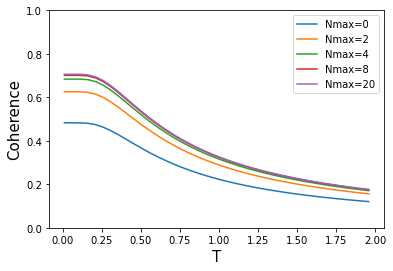

In [146]:
plt.plot(T,coh_nmax(1, Beta, 0.2, 0))
plt.plot(T,coh_nmax(2, Beta, 0.2, 0))
plt.plot(T,coh_nmax(4, Beta, 0.2, 0))
plt.plot(T,coh_nmax(8, Beta, 0.2, 0))
plt.plot(T,coh_nmax(20, Beta, 0.2, 0))
plt.xlabel("T",size=15)
plt.ylabel("Coherence", size=15)
plt.ylim(0,1)
plt.legend(["Nmax=0", "Nmax=2", "Nmax=4", "Nmax=8", "Nmax=20"])
plt.show()

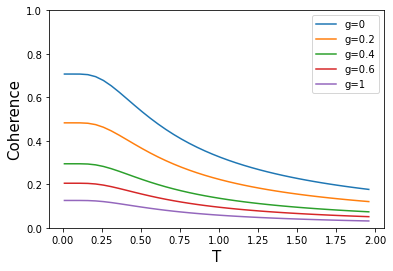

In [147]:
plt.plot(T,coh_nmax(1, Beta, 0.0, 0))
plt.plot(T,coh_nmax(1, Beta, 0.2, 0))
plt.plot(T,coh_nmax(1, Beta, 0.4, 0))
plt.plot(T,coh_nmax(1, Beta, 0.6, 0))
plt.plot(T,coh_nmax(1, Beta, 1.0, 0))
plt.xlabel("T",size=15)
plt.ylabel("Coherence", size=15)
plt.ylim(0,1)
plt.legend(["g=0", "g=0.2", "g=0.4", "g=0.6", "g=1"])
plt.show()

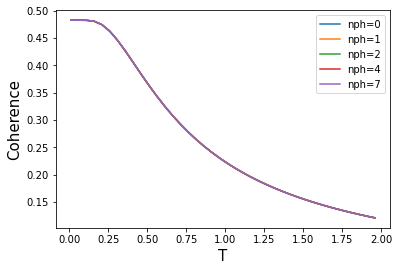

In [148]:
plt.plot(T,coh_nmax(1, Beta, 0.2, 0))
plt.plot(T,coh_nmax(1, Beta, 0.2, 1))
plt.plot(T,coh_nmax(1, Beta, 0.2, 2))
plt.plot(T,coh_nmax(1, Beta, 0.2, 4))
plt.plot(T,coh_nmax(1, Beta, 0.2, 7))
plt.xlabel("T",size=15)
plt.ylabel("Coherence", size=15)
plt.legend(["nph=0", "nph=1", "nph=2", "nph=4", "nph=7"])
plt.show()